In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style='white')

In [2]:
df = pd.read_csv('churn.csv')
df.head(5)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

Churn
No     0.734668
Yes    0.265332
dtype: float64


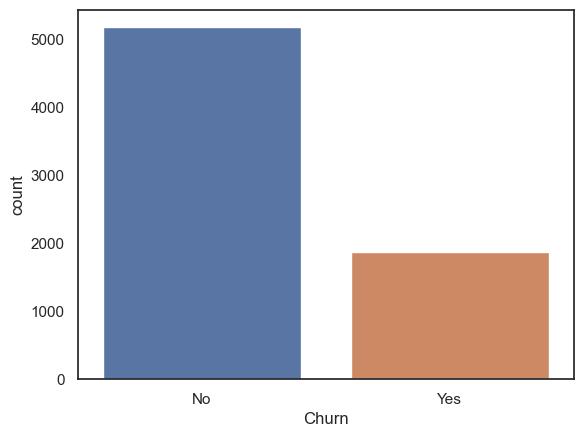

In [4]:
sns.countplot(x='Churn', data=df);
print(df.groupby('Churn').size()/len(df))

In [5]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID', 'Total Charges'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
y_train.head()

4961    1
1865    0
4096    0
6821    0
4767    0
Name: Churn, dtype: int64

In [7]:
# Model Training
from sklearn.linear_model import LogisticRegression
model_ = LogisticRegression(max_iter=100, solver='liblinear')
f = model_.fit(X_train, y_train);

In [8]:
# Model Validation
# Prediction on test data
prediction_test = model_.predict(X_test)
prediction_probas = model_.predict_proba(X_test)[:,1]
from sklearn import metrics
# Accuracy Score
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy on test set: {}'.format(acc))


Accuracy on test set: 0.808374733853797


C:\Users\poush\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


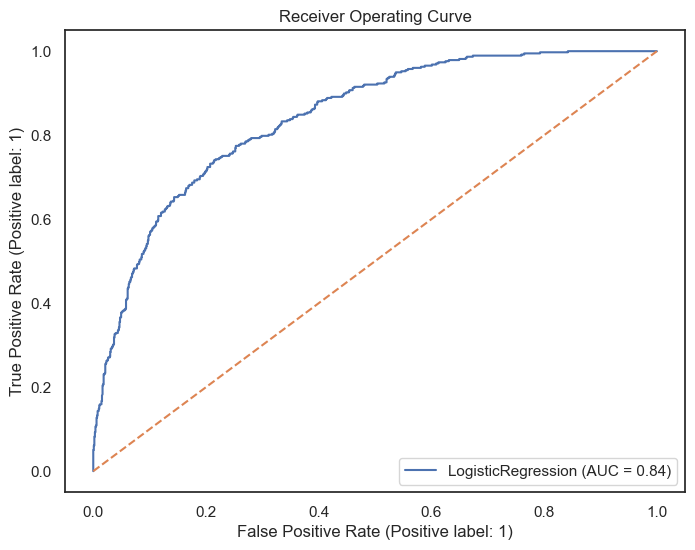

In [9]:
# ROC Curve, AUC
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Receiver Operating Curve')
plot = metrics.plot_roc_curve(model_, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');